# Layer visualization with PCA

In [1]:
%load_ext autoreload
%autoreload 2

## Initialization

Imports

In [2]:
import sys
sys.path.append('../')

from setup import setup_device, setup_datamodule, load_model



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

nnUNet_raw_data_base is not defined and nnU-Net can only be used on data for which preprocessed files are already present on your system. nnU-Net cannot be used for experiment planning and preprocessing like this. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up properly.
nnUNet_preprocessed is not defined and nnU-Net can not be used for preprocessing or training. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up.
RESULTS_FOLDER is not defined and nnU-Net cannot be used for training or inference. If this is not in

Set the device globally

In [3]:
device = setup_device('cuda:1')
print(device, type(device))

cuda:1 <class 'torch.device'>


Load a trained model

In [4]:
model = load_model('../pre-trained/trained_UNets/mnmv2-00-02_22-11-2024-v1.ckpt', device)

Loaded as Lightning module


Initialize mnmv2 dataset module

In [5]:
datamodule = setup_datamodule()

Take the first batch from the datamodule

In [6]:
data_batch = next(iter(datamodule.val_dataloader()))
data_sample = data_batch['input']

data_sample.size() # [batch size, channels, width, hegiht]

torch.Size([32, 1, 256, 256])

Use hooks to capture hidden layer activations

In [7]:
from adapters.main import capture_conv_layers

wrapper, layer_names = capture_conv_layers(model, device, data_sample)

## Experiments

In [24]:
from dimensionality_reduction.utils import reduce_channels_pca
from color_space_transformers import map_to_rgb
from layer_mapper import LayerMapper
from feature_visualizer import FeatureVisualizer
from dataset_visualizer import DatasetVisualizer

input_size = list(data_sample.size())[-2:]

layer_mapper = LayerMapper(wrapper, layer_names, reduce_channels_pca, input_size)
feature_visualizer = FeatureVisualizer(map_to_rgb)
dataset_visualizer = DatasetVisualizer(device, model, layer_mapper, feature_visualizer)


IMAGE ID 10


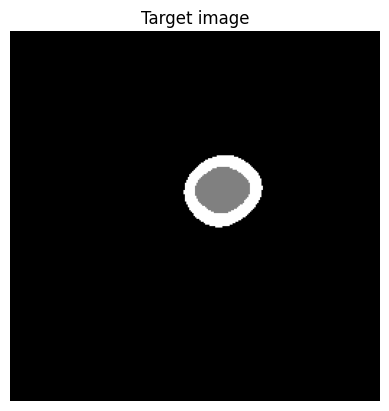

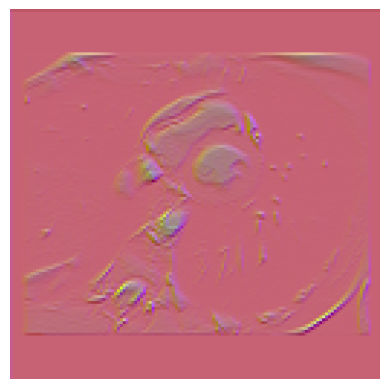

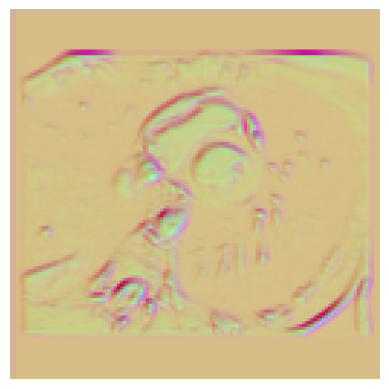

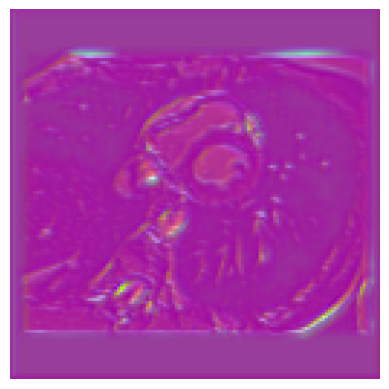

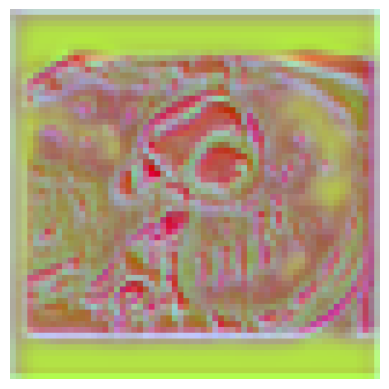

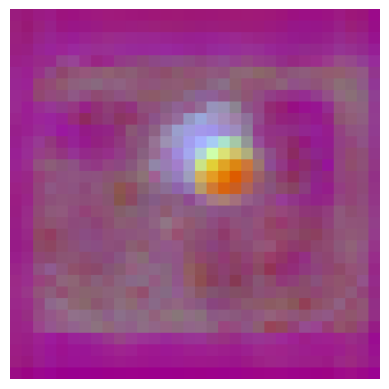

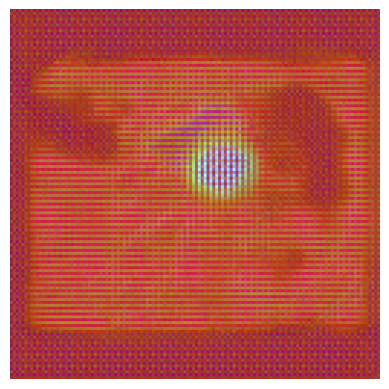

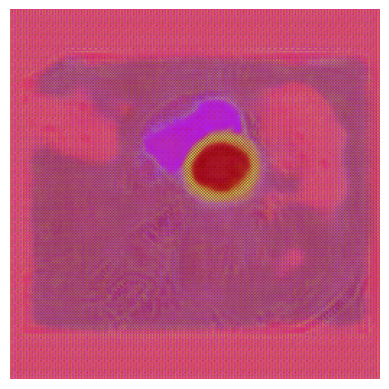

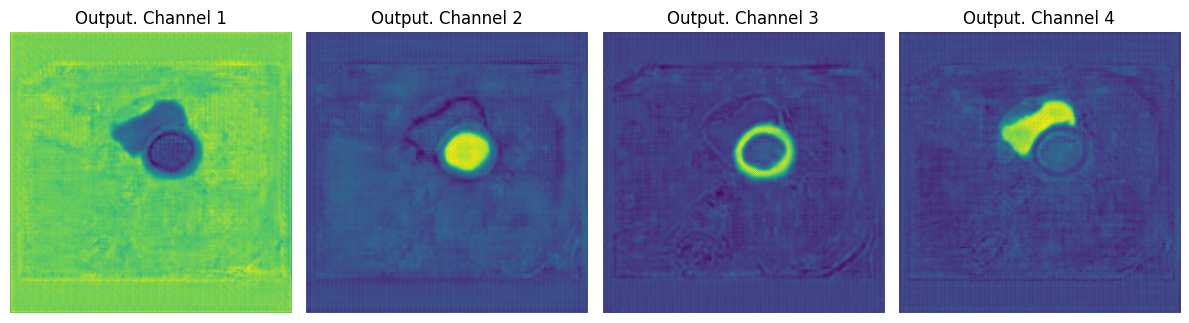

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-128.0..127.000015].


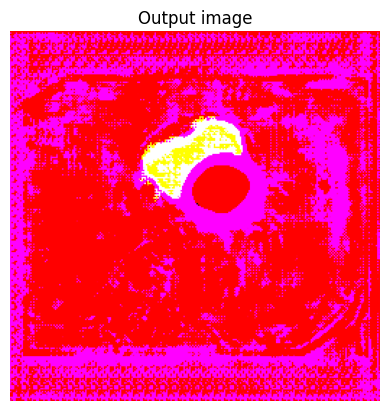


IMAGE ID 30


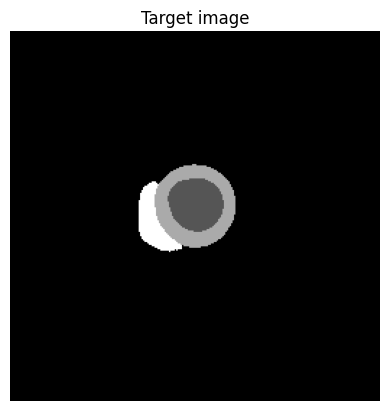

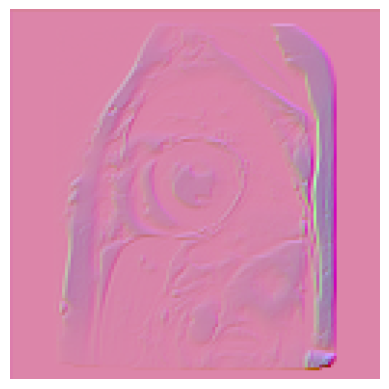

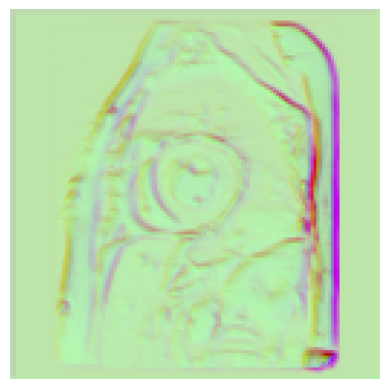

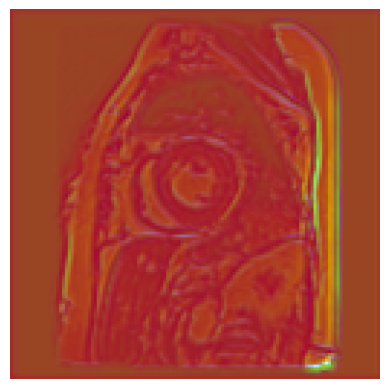

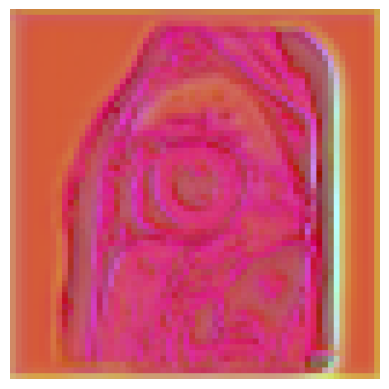

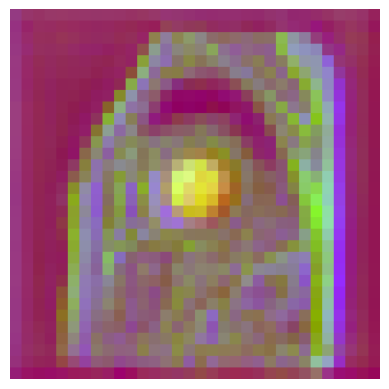

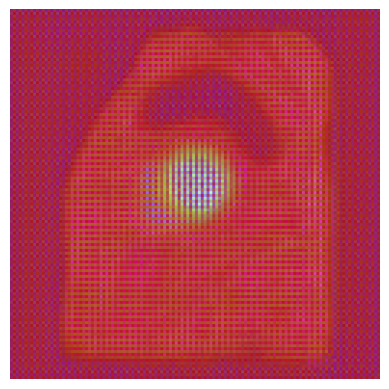

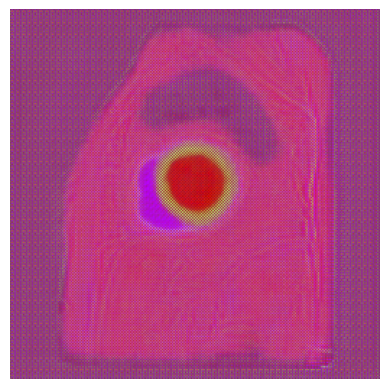

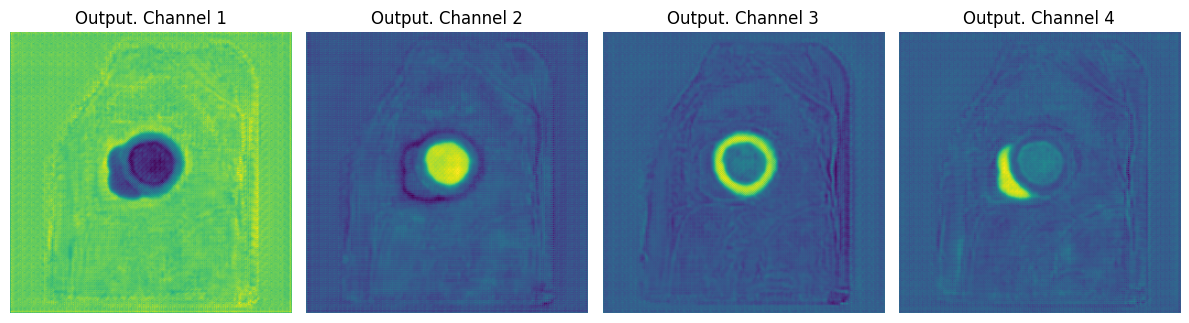

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-128.0..126.99999].


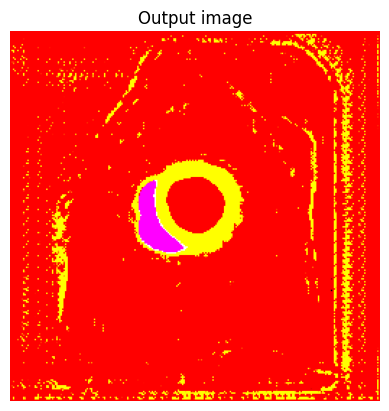

In [25]:
LAYER_SELECTION = [3,10,20,50,100,110,-1]
IMAGE_IDS = [10, 30] # id of an image in the batch (range 0..31)

dataset_visualizer.set_data(data_batch)
dataset_visualizer.visualize(IMAGE_IDS, LAYER_SELECTION)